## 1. Import library & Data

In [1]:
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
import time

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
import statsmodels.api as sm
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침
from statsmodels.graphics.mosaicplot import mosaic

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# scikit-learn 패키지
from sklearn import svm
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline

In [2]:
dr = pd.read_csv('wine_train.csv')

In [3]:
df = dr
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [4]:
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


## 2. EDA

In [5]:
# Object 형태의 Data 분포 확인 #
df_obj = df.select_dtypes(include = 'object')
for c in df_obj.columns:
    print ("---- %s ---" % c)
    print (df_obj[c].value_counts())

---- type ---
white    2453
red       778
Name: type, dtype: int64


In [6]:
## y(quality) Data 분포 확인 ##
print(df['quality'].value_counts())

6    1418
5    1069
7     539
4     108
8      97
Name: quality, dtype: int64


In [7]:
# id col 제거 #
df = df.drop(['id'], axis = 1)

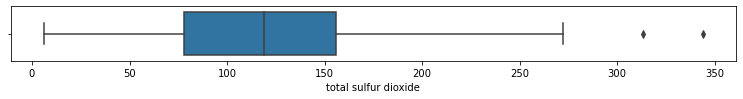

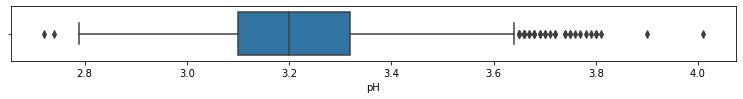

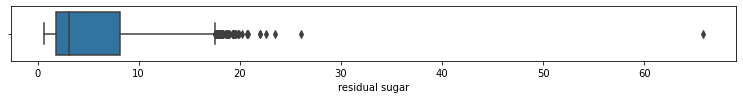

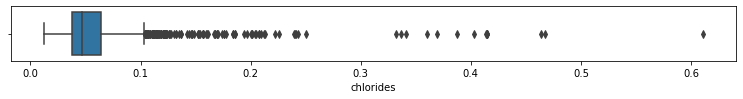

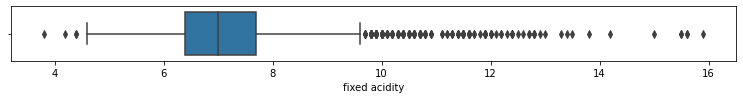

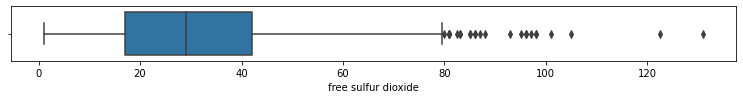

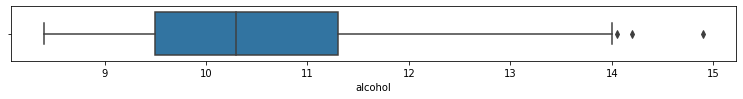

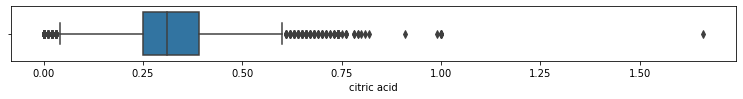

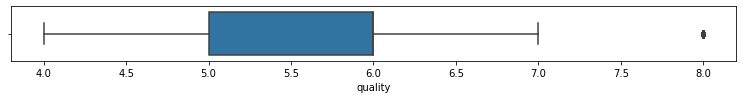

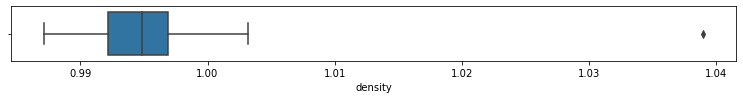

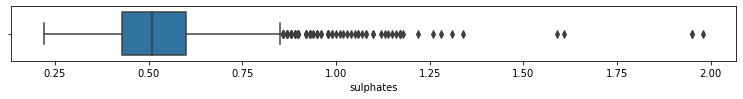

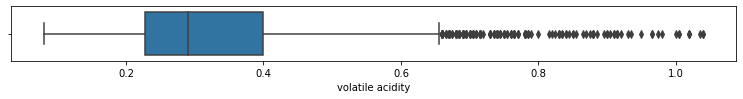

In [8]:
# View Data (Boxplot) (From 민성님 코드) #
fac_col = df.select_dtypes("object").columns.tolist()
num_col = list(set(df).difference(set(fac_col))) #df1=df.select_dtypes(exclude=['object'])
df1 = df[num_col]

for column in df1:
    plt.figure(figsize=(len(num_col)+1,1))
    sb.boxplot(data=df1, x=column)  

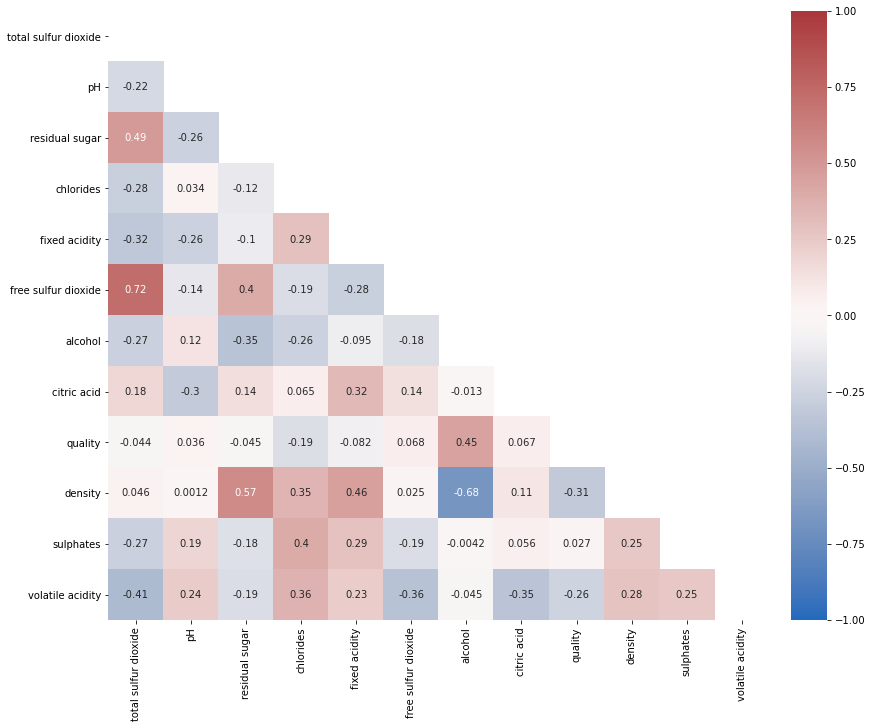

In [9]:
# View Data (Correlation Heatmap) (From 민성님 코드) #
df1_corr = df1.corr()
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like( df1_corr, dtype=np.bool )
mask[ np.triu_indices_from( mask ) ] = True
# 히트맵 시각화
plt.figure(figsize=(12,10),
            constrained_layout = True)
sb.heatmap( df1_corr,
            annot = True,
            cmap = 'vlag',  # https://seaborn.pydata.org/tutorial/color_palettes.html
            mask = mask,
            vmin = -1, vmax = 1, center = 0)
plt.show()
print()

## 3. Decision tree

In [10]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [11]:
X['type'] = pd.get_dummies(X['type'], drop_first = True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [13]:
tree=DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.01)
model=tree.fit(X_train, y_train)

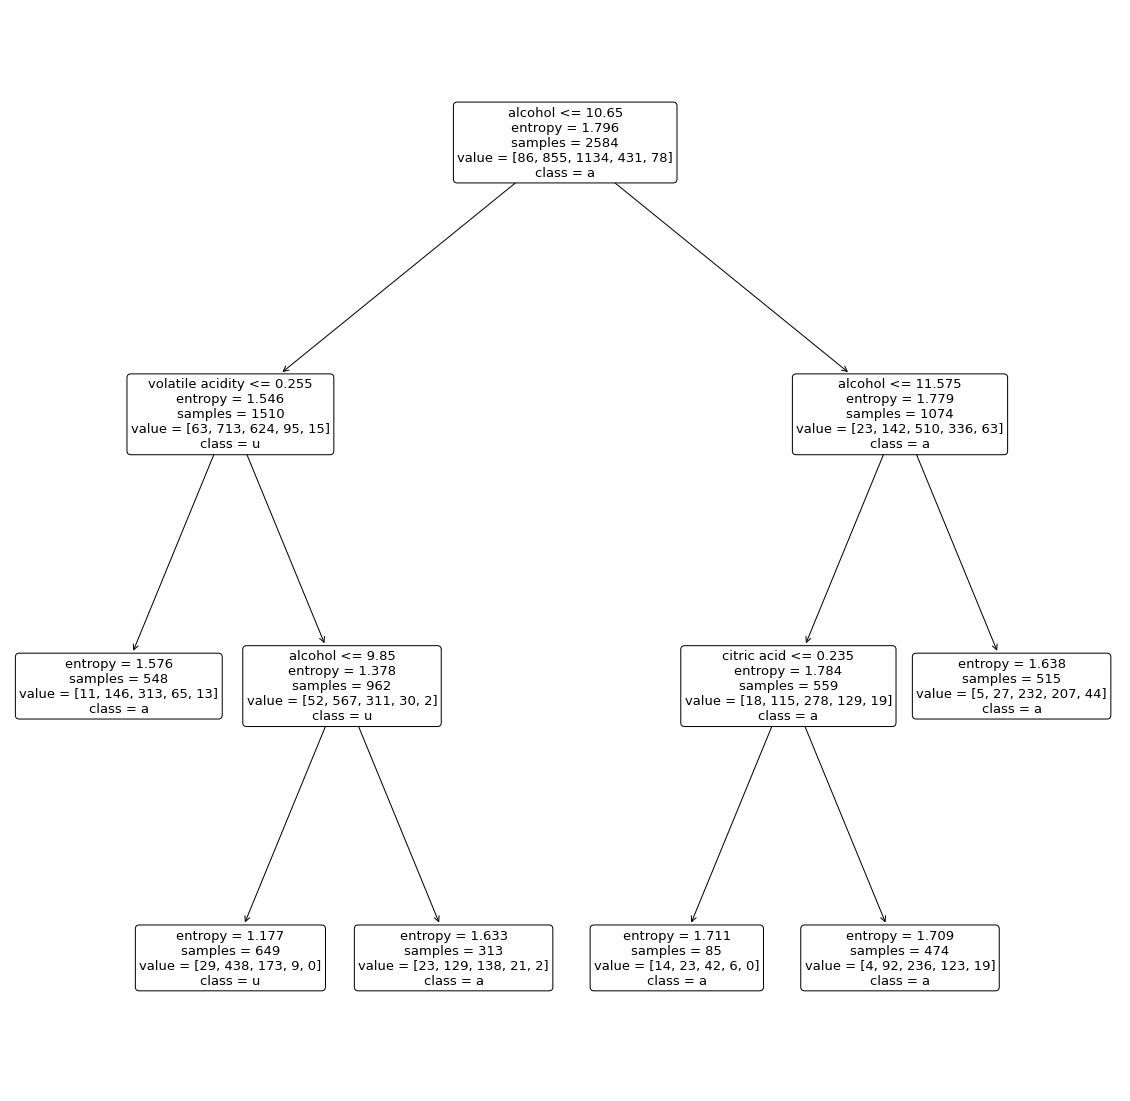

In [22]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(model, class_names='quality', feature_names=X_train.columns, impurity=True, filled=False, rounded=True)
plt.savefig('tree.png')
plt.show()

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

[[  0   9  13   0   0]
 [  0 106 108   0   0]
 [  0  56 228   0   0]
 [  0   1 107   0   0]
 [  0   1  18   0   0]]
예측 정확도: 0.5162


fixed acidity : 0.000
volatile acidity : 0.207
citric acid : 0.059
residual sugar : 0.000
chlorides : 0.000
free sulfur dioxide : 0.000
total sulfur dioxide : 0.000
density : 0.000
pH : 0.000
sulphates : 0.000
alcohol : 0.734
type : 0.000


<AxesSubplot:>

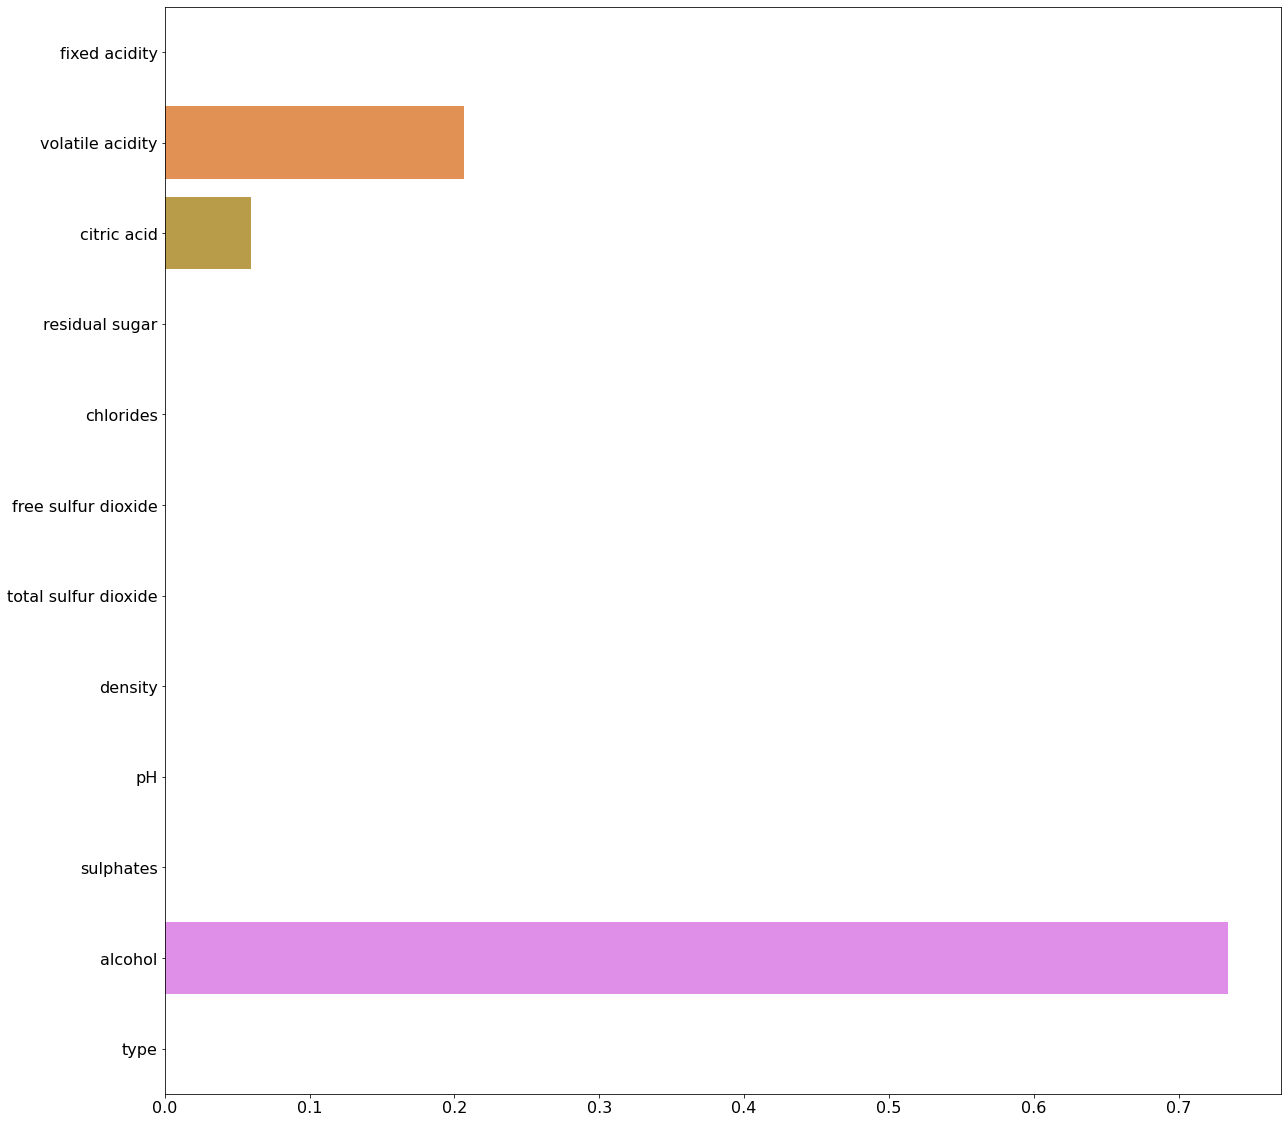

In [16]:
for name, value in zip(X.columns , model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sb.barplot(x=model.feature_importances_ , y=X.columns)

In [17]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred =  forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

[[  2  13   7   0   0]
 [  0 147  65   2   0]
 [  0  58 207  19   0]
 [  0   6  51  50   1]
 [  0   0  11   5   3]]
예측 정확도: 0.6321


In [18]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

[[  0  15   7   0   0]
 [  0 135  79   0   0]
 [  0  79 205   0   0]
 [  0  11  97   0   0]
 [  0   0  19   0   0]]
예측 정확도: 0.5255


### svm parameters ###
C : float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degree : int, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : {‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

Changed in version 0.22: The default value of gamma changed from ‘auto’ to ‘scale’.

coef0 : float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

shrinking : bool, default=True
Whether to use the shrinking heuristic. See the User Guide.

probability : bool, default=False
Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.

tol : float, default=1e-3
Tolerance for stopping criterion.

cache_size : float, default=200
Specify the size of the kernel cache (in MB).

class_weight : dict or ‘balanced’, default=None
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

verbose : bool, default=False
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

max_iter : int, default=-1
Hard limit on iterations within solver, or -1 for no limit.

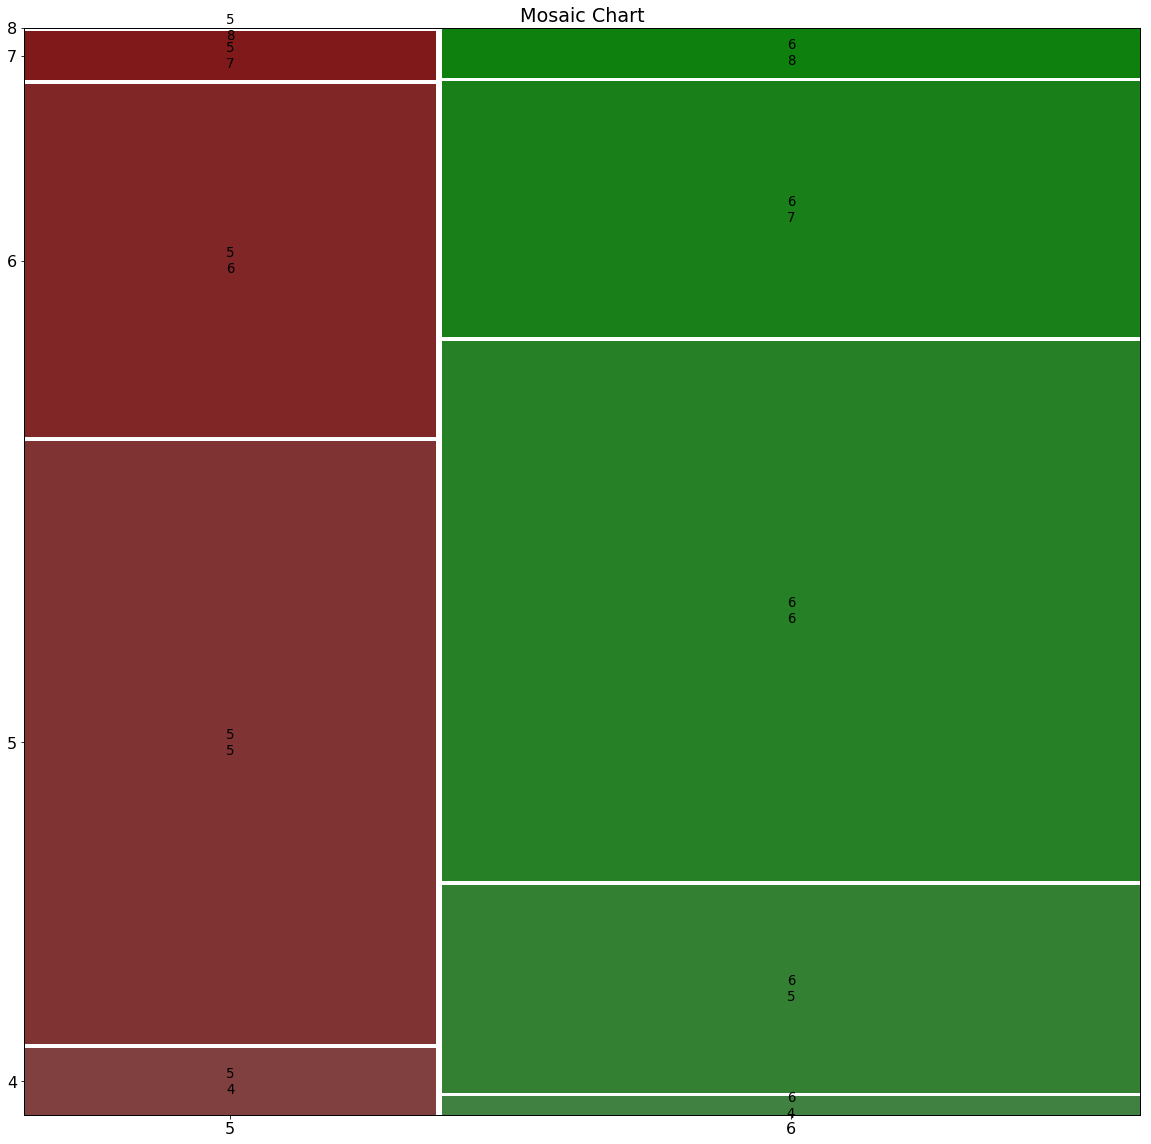

In [19]:
# Classification result Visualization (Using mosaic plot) #

from statsmodels.graphics.mosaicplot import mosaic
y_test_vis = pd.DataFrame(y_test)
y_test_vis['pred'] = y_pred
mosaic(y_test_vis.sort_values('quality'), ['pred', 'quality'], 

      title='Mosaic Chart')

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

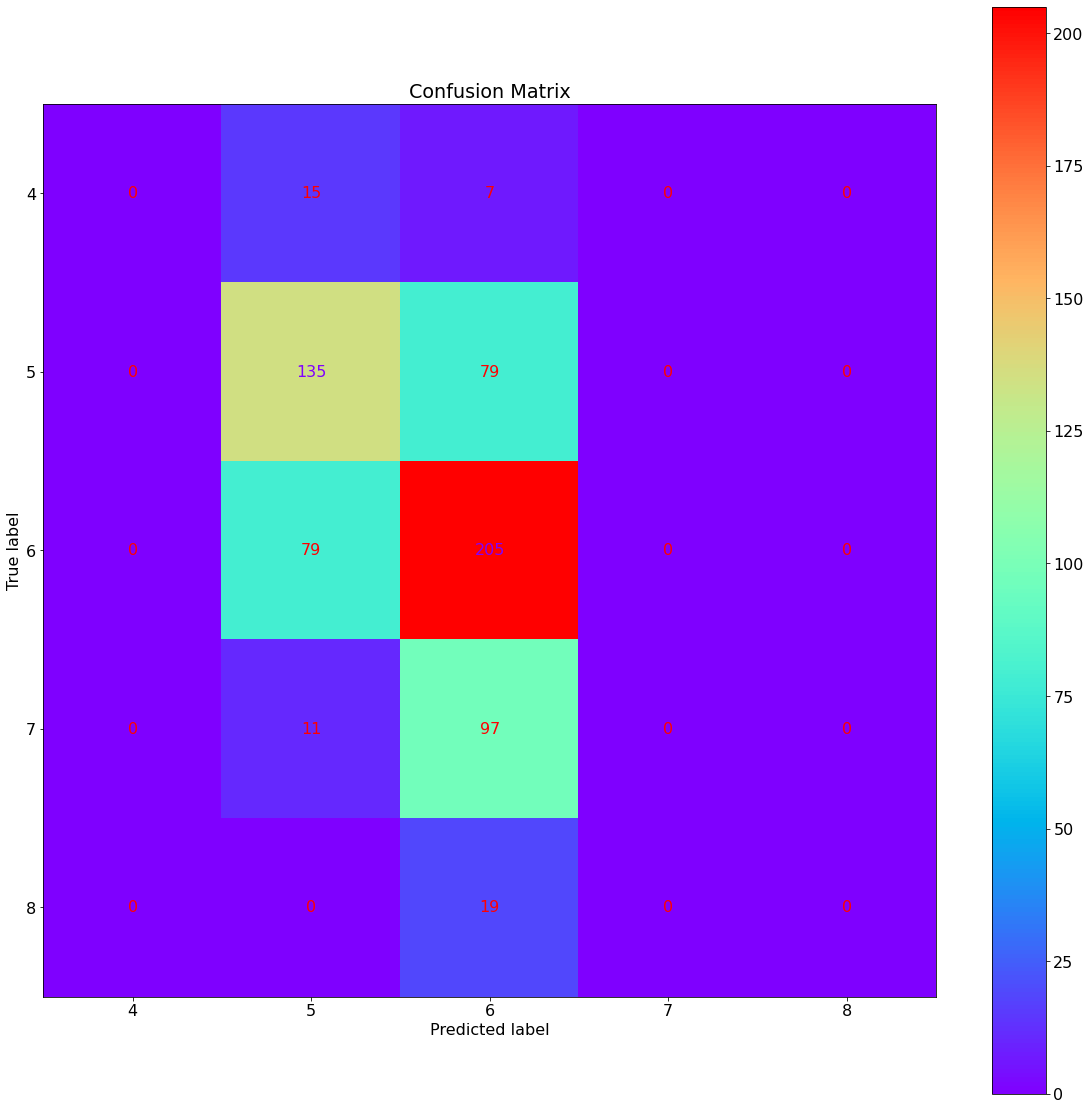

In [21]:
label = np.unique(y_test)
plot = plot_confusion_matrix(clf, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.rainbow, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')